In [6]:
import pymc3 as pm


In [72]:
with Model() as model:

    # Data
    Y = [0,1,2,3,8]

    # Prior model probabilities
    pi = [0.5, 0.5]

    # Index to true model
    true_model = pm.Bernoulli('true_model', pi[1])

    # Poisson mean
    mu = pm.Uniform('mu', 0, 1000)

    # Geometric probability
    p = 1/(1+mu)

    Ylike = pm.DensityDist('Ylike',
            lambda value: pm.math.switch(true_model, 
                pm.Poisson.dist(mu).logp(value), 
                pm.Geometric.dist(p).logp(value+1)
            ),
            observed=Y)
    
    pm.Deterministic('log_prob', model.logpt)

    trace = sample(10000, step=pm.Metropolis())

    summary(trace[5000:])

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [mu]
>Metropolis: [true_model]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:07<00:00, 5607.52draws/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f140c95a048>,
      dtype=object)

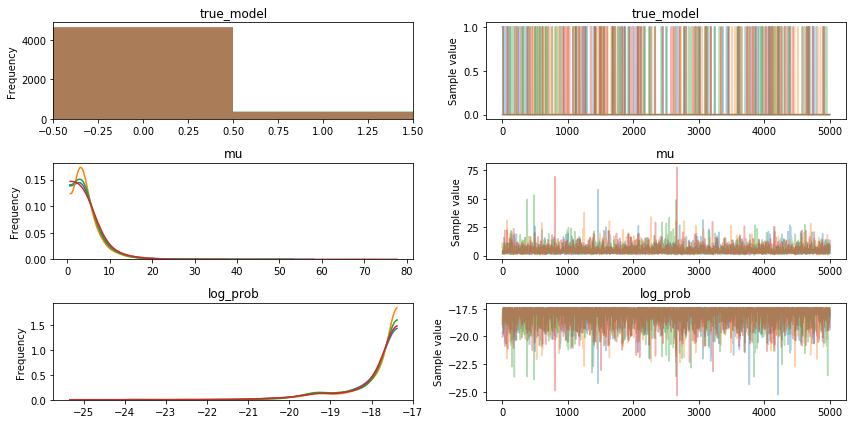

In [73]:
pm.traceplot(trace[5000:])

In [74]:
p_pois = trace[5000:]['true_model'].mean()  # mean value (i.e. the rate of poisson samples to all samples)
BF = ((1-p_pois)/p_pois) * (pi[1]/pi[0])  # BayesFactor in favor of poisson model, taking prior probability into account

BF

12.888888888888891

In [75]:
summary(trace[5000:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
true_model,0.072000,0.258488,0.005162,0.000000,1.000000,2602.269634,0.999972
mu,4.891660,3.817404,0.054436,0.989471,11.738517,4070.971217,0.999960
log_prob,-18.041996,0.866523,0.014200,-19.752830,-17.383067,3647.124300,1.000135


In [10]:
summary(trace[5000:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
true_model,0.399750,0.489847,0.008095,0.000000,1.000000,3224.792291,1.000398
mu,4.166195,3.207314,0.054338,1.004109,9.578516,2939.258519,1.000324
